In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784",version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X,y = mnist["data"],mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

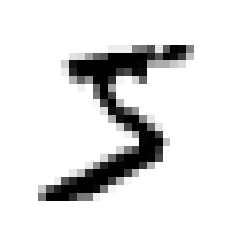

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
y = y.astype(np.uint8)

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [17]:
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv= 3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [19]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y= None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_perdict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [21]:
y_train_perdict

array([ True, False, False, ...,  True, False, False])

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_perdict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [23]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_perdict)


0.8370879772350012

In [25]:

recall_score(y_train_5,y_train_perdict)

0.6511713705958311

In [26]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_perdict)

0.7325171197343846

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [28]:
threshold =0

y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [29]:
threshold= 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [30]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [75]:
y_scores.shape

(60000,)

In [32]:
from  sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

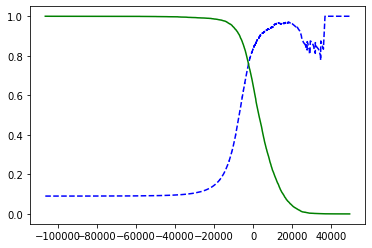

In [33]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--", label= "Precision")
    plt.plot(thresholds,recalls[:-1],"g-", label= "Recall")
    
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()

In [34]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr , thresholds = roc_curve(y_train_5,y_scores)

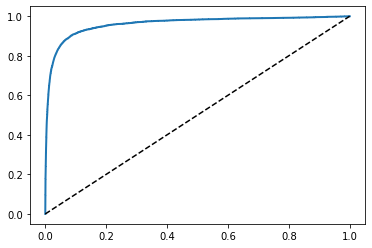

In [39]:
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr,linewidth =2 ,label = label)
    plt.plot([0,1],[0,1],"k--")
    
plot_roc_curve(fpr,tpr)

plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

C:\Users\Hieu Koi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hieu Koi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hieu Koi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


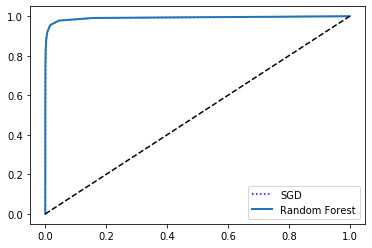

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv =3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr_forest,tpr_forest,"b:",label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [42]:
roc_auc_score(y_train_5,y_scores_forest)

0.9920527492698306

In [43]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [44]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [45]:
np.argmax(some_digit_scores)

3

In [46]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
sgd_clf.classes_[5]

5

In [48]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state= 42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])


array([5], dtype=uint8)

In [49]:
len(ovo_clf.estimators_)

45

In [50]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

C:\Users\Hieu Koi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [51]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv= 3,scoring = "accuracy")

C:\Users\Hieu Koi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled,y_train,cv=3)
comf_mx = confusion_matrix(y_train,y_train_pred)

C:\Users\Hieu Koi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


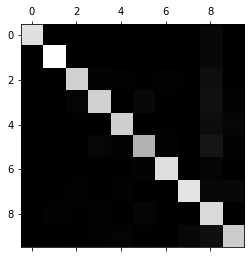

In [57]:
plt.matshow(comf_mx,cmap = plt.cm.gray)
plt.show()

In [59]:
row_sums = comf_mx.sum(axis = 1 , keepdims = True)
norm_conf_mx = comf_mx/row_sums

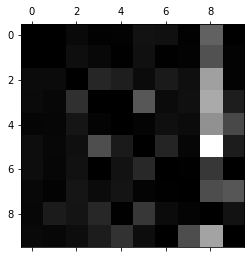

In [61]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
plt.show()

In [66]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

ZeroDivisionError: integer division or modulo by zero

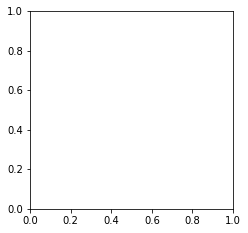

In [68]:
cl_a,cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_perdict == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_perdict == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_perdict == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_perdict == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25],images_per_row=5)
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 ==1)
y_mutilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_mutilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [73]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_mutilabel,cv=3)
f1_score(y_mutilabel,y_train_knn_pred,average="macro")

0.976410265560605

In [74]:
f1_score(y_mutilabel,y_train_knn_pred,average="weighted")

0.9778357403921755

In [77]:
nosie = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + nosie
nosie = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + nosie
y_train_mod = X_train
y_test_mod = X_test

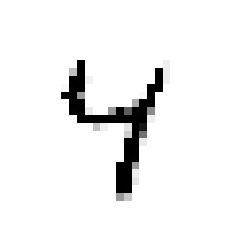

In [80]:
knn_clf.fit(X_train_mod,y_train_mod)
clear_digit = knn_clf.predict([X_test_mod[6]])
plot_digits(clear_digit)